In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

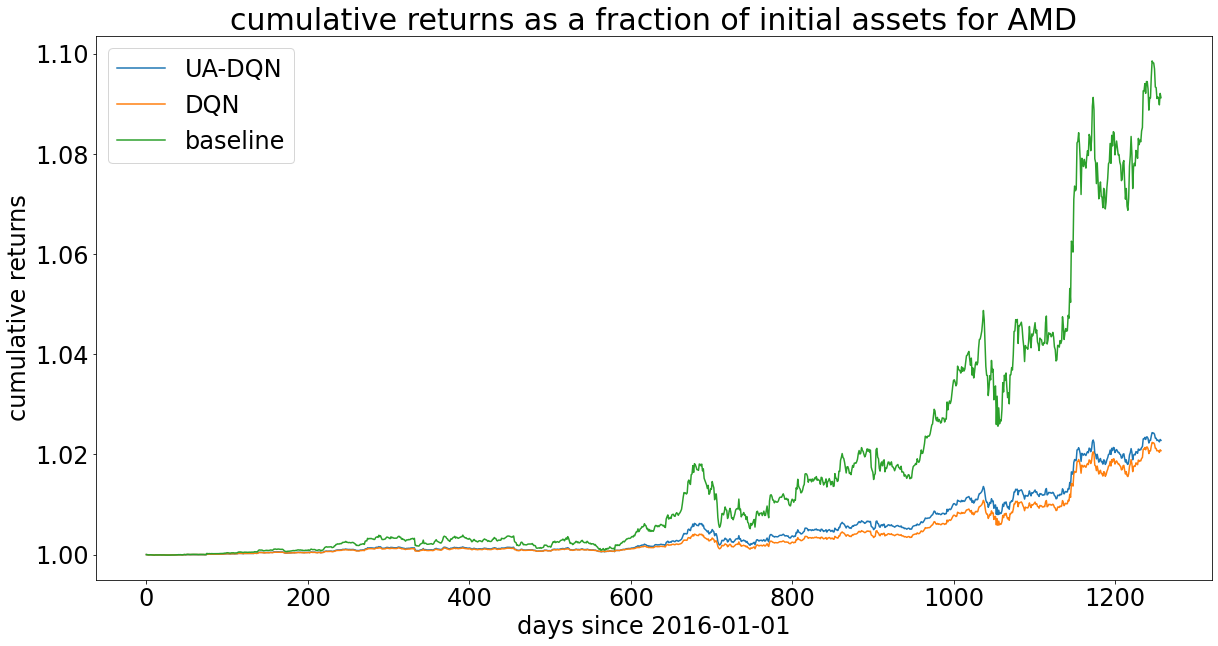

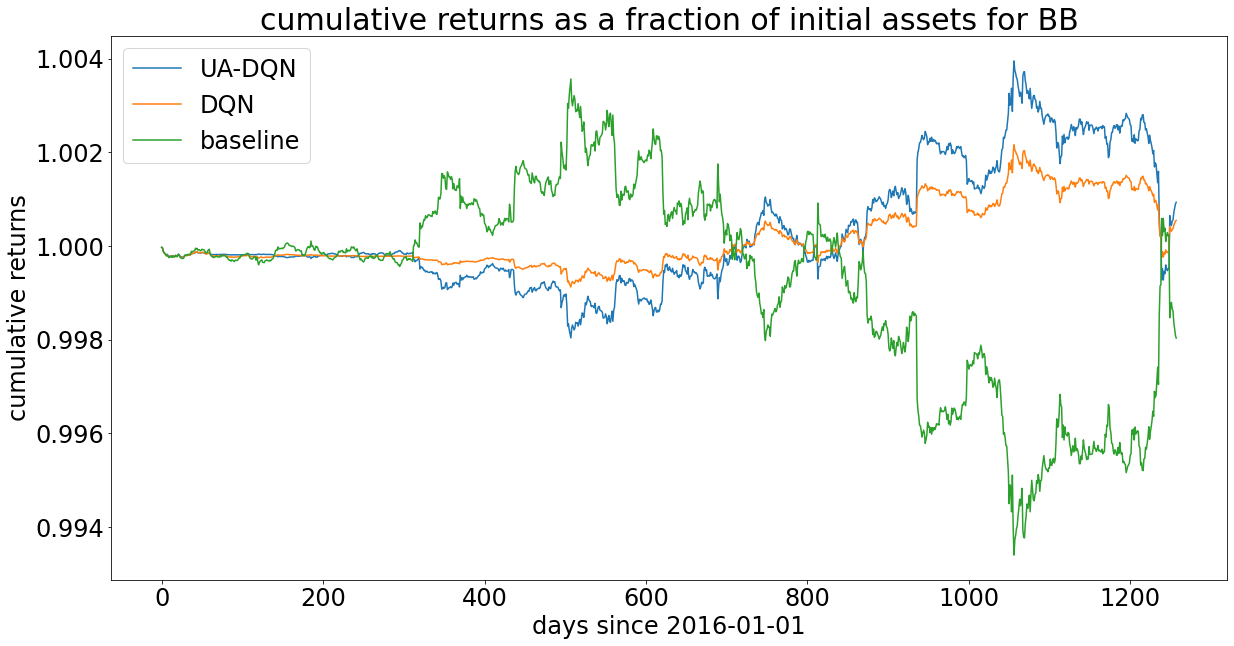

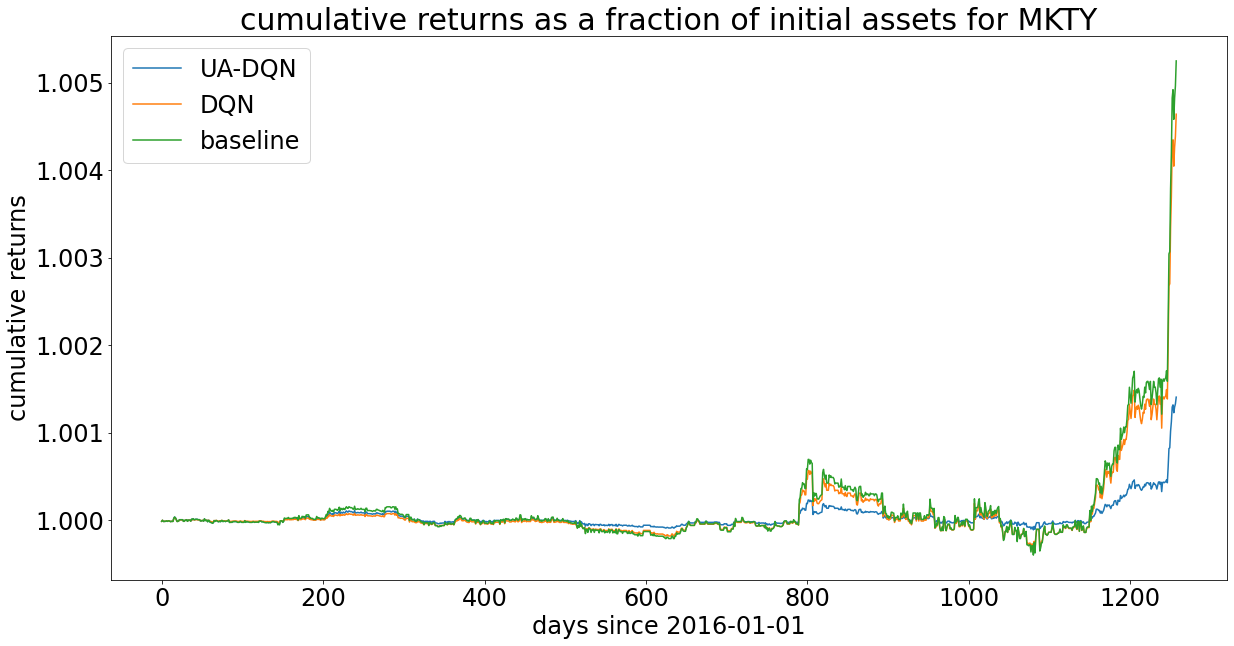

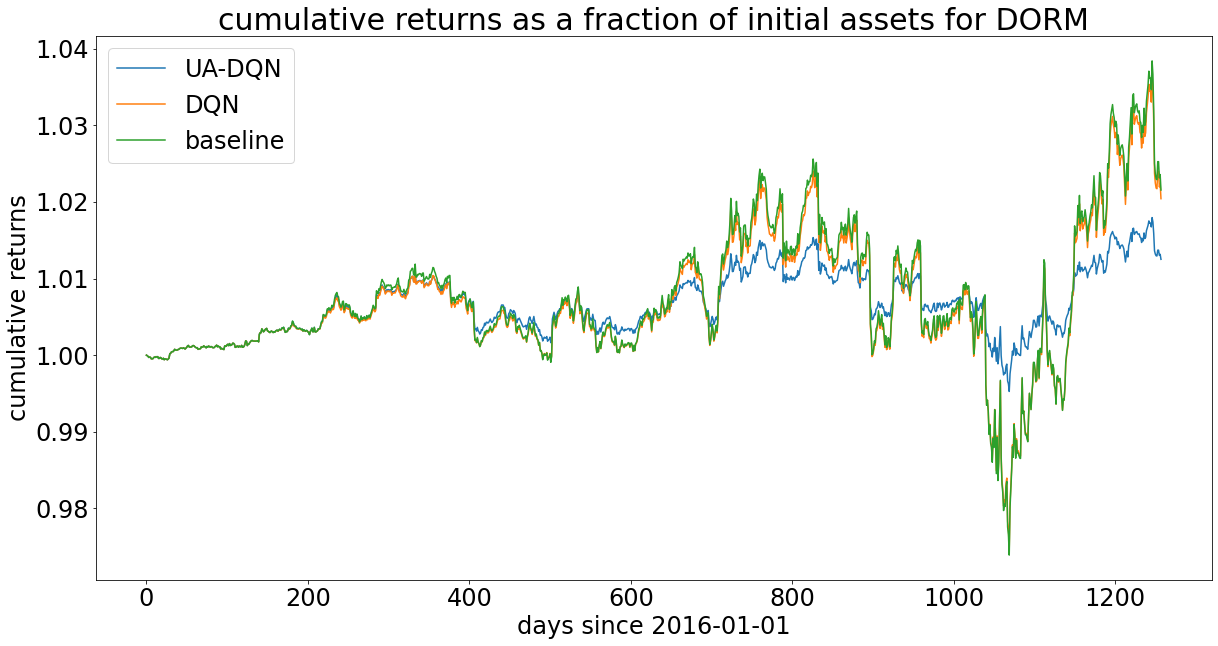

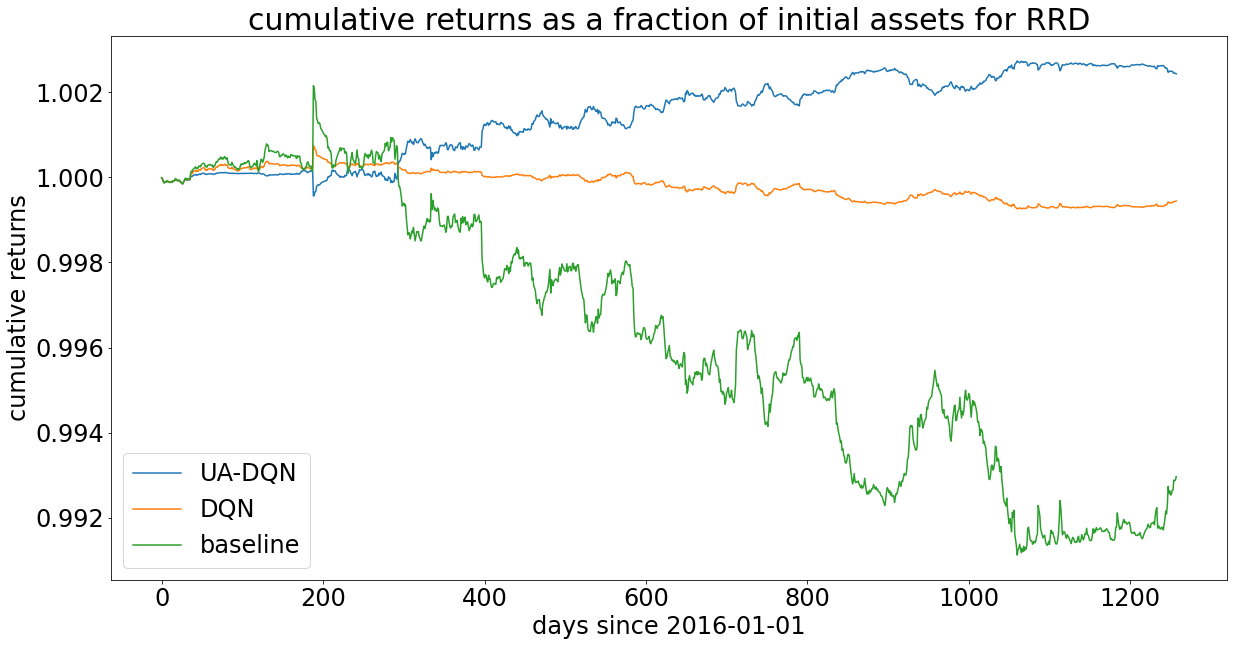

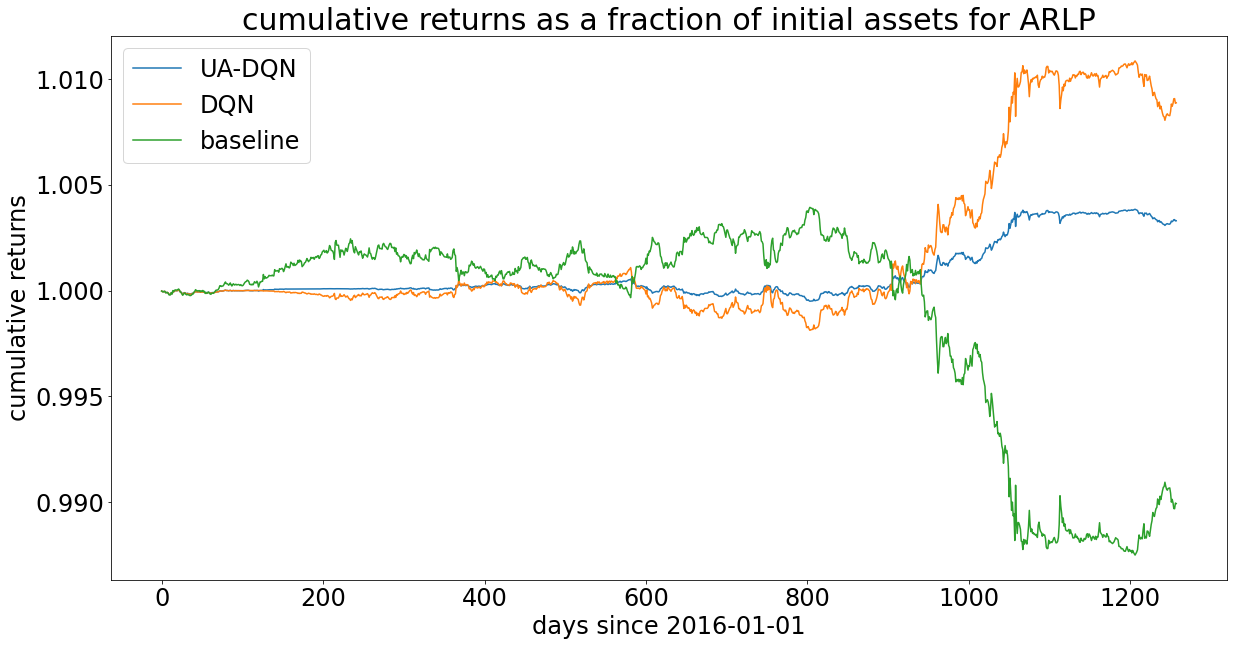

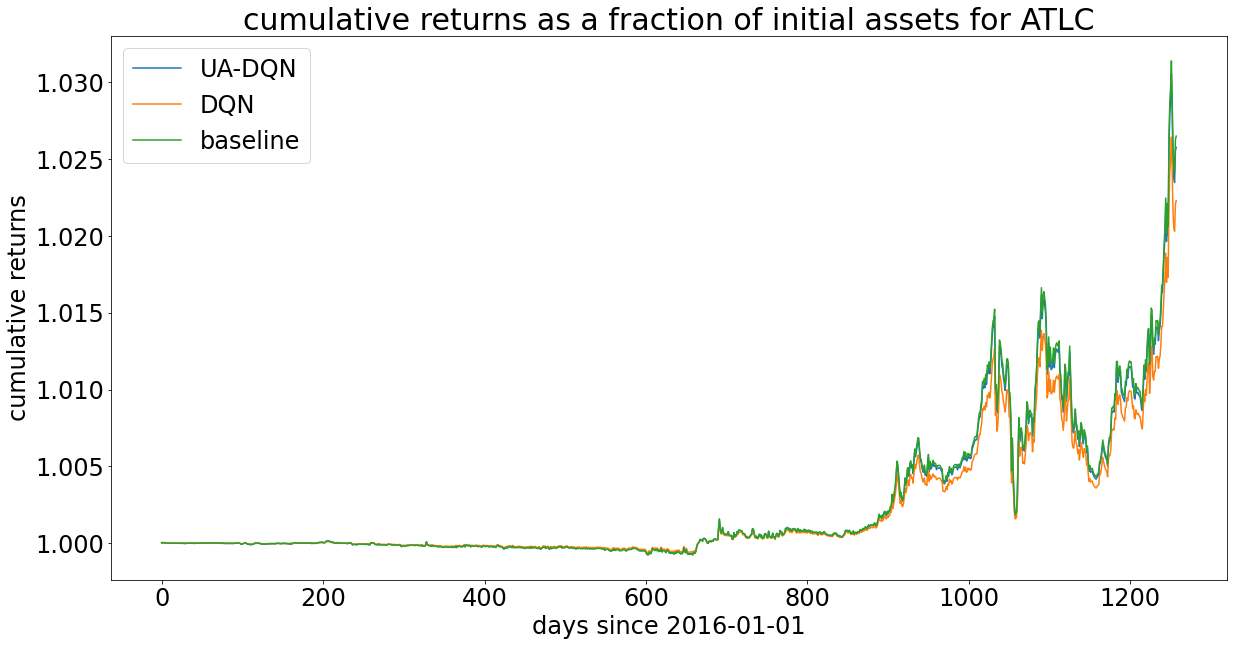

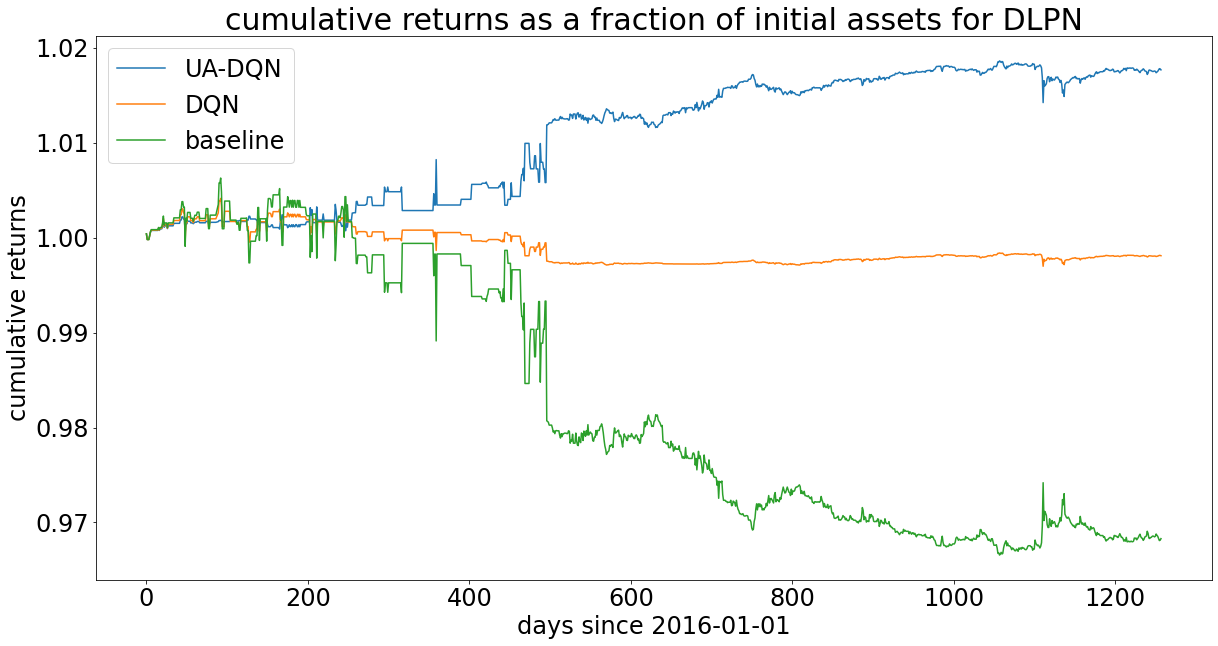

In [32]:
baseline_path = 'Baseline/StockTradingEnv-v1-'
uadqn_path = 'AgentUADQN/StockTradingEnv-v1-'
dqn_path = 'AgentDQN/StockTradingEnv-v1-'
save_path = 'analysis/'

cr_file = 'cumulative_return.npy'
crwl_file = 'cumulative_return_while_learning.npy'
recorder_file = 'recorder.npy'
action_file = 'action_over_time.npy'
action_wl_file = 'action_over_time_while_learning.npy'

tickers = ['AMD', 'BB', 'MKTY', 'DORM', 'RRD', 'ARLP', 'ATLC', 'DLPN']

for ticker in tickers:
    file_name = uadqn_path + ticker + '_0/' + cr_file
    cr_data = np.load(file_name)
    plt.figure(figsize=(20,10))
    plt.title('cumulative returns as a fraction of initial assets for {}'.format(ticker), fontsize=30)
    plt.xlabel('days since 2016-01-01', fontsize=24)
    plt.ylabel('cumulative returns', fontsize=24)
    plt.yticks(fontsize=24)
    plt.xticks(fontsize=24)
    
    plt.plot(cr_data, label='UA-DQN')
    
    file_name = dqn_path + ticker + '_0/' + cr_file
    cr_data = np.load(file_name)
    plt.plot(cr_data, label='DQN')
    
    file_name = baseline_path + ticker + '/' + cr_file
    cr_data = np.load(file_name)
    plt.plot(cr_data, label='baseline')
    plt.legend(fontsize=24)
    plt.savefig(save_path+'cumulative_returns_{}.jpg'.format(ticker))
    
    



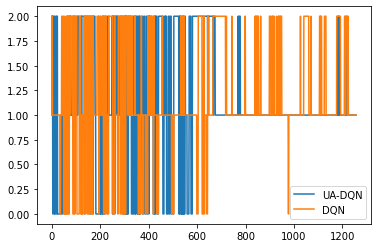

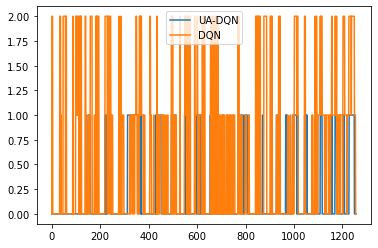

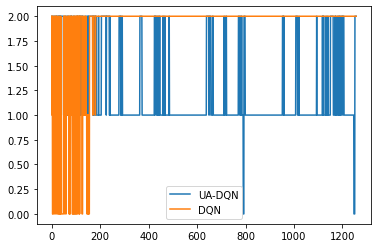

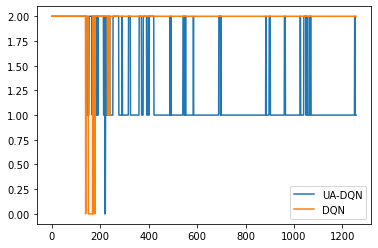

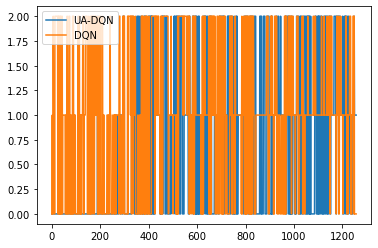

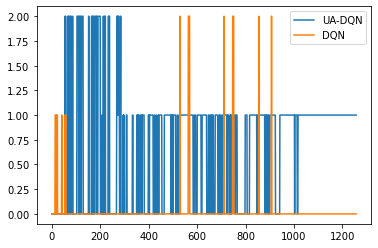

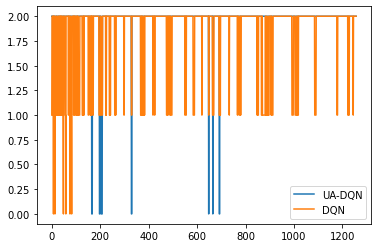

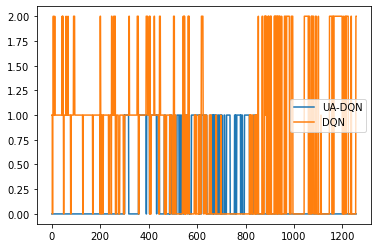

In [24]:
for ticker in tickers:
    file_name = uadqn_path + ticker + '_0/' + action_file
    cr_data = np.load(file_name)
    plt.plot(cr_data, label='UA-DQN')
    
    file_name = dqn_path + ticker + '_0/' + action_file
    cr_data = np.load(file_name)
    plt.plot(cr_data, label='DQN')
    
    plt.legend()
    plt.show()

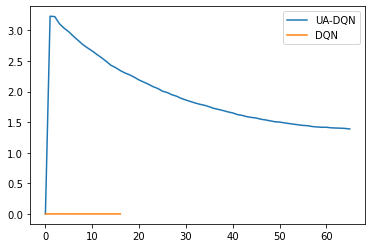

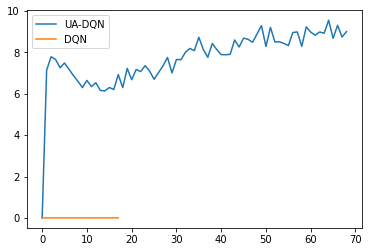

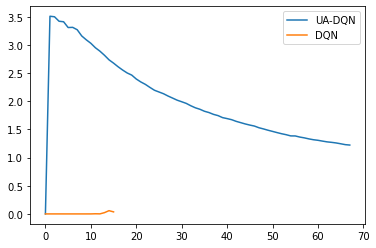

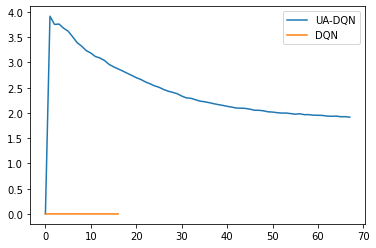

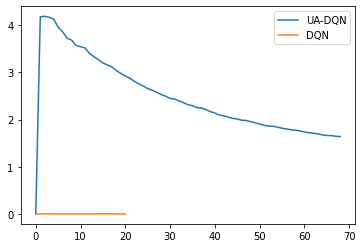

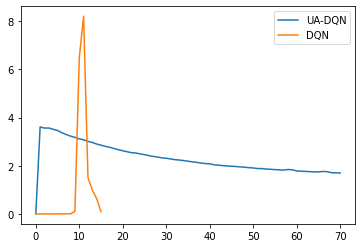

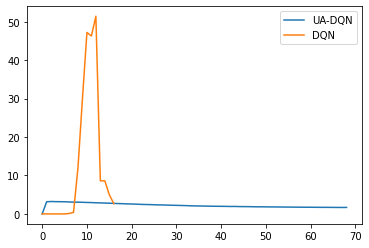

In [14]:
for ticker in tickers:
    file_name = uadqn_path + ticker + '_0/' + recorder_file
    cr_data = np.load(file_name)[:, -1]
    plt.plot(cr_data, label='UA-DQN')
    
    file_name = dqn_path + ticker + '_0/' + recorder_file
    cr_data = np.load(file_name)[:, -1]
    plt.plot(cr_data, label='DQN')
    
    plt.legend()
    plt.show()

In [35]:
file_name = uadqn_path + ticker + '_0/' + recorder_file
loss = np.load(file_name)[:, -2]

In [33]:

result_data = pd.DataFrame(columns=['Stock Name', 'DQN', 'UA-DQN', 'Baseline'])

for ticker in tickers:
    file_name = uadqn_path + ticker + '_0/' + cr_file
    uadqn = np.load(file_name)[-1]
    
    file_name = dqn_path + ticker + '_0/' + cr_file
    dqn = np.load(file_name)[-1]
    
    file_name = baseline_path + ticker + '/' + cr_file
    baseline = np.load(file_name)[-1]
    
    result_data = result_data.append({'Stock Name': ticker, 'DQN': dqn, 'UA-DQN': uadqn, 'Baseline': baseline}, ignore_index=True)

In [34]:
result_data

,Stock Name,DQN,UA-DQN,Baseline
0,AMD,1.020747,1.022819,1.091272
1,BB,1.000547,1.000933,0.998036
2,MKTY,1.004639,1.001407,1.005248
3,DORM,1.020432,1.012508,1.021563
4,RRD,0.999441,1.002427,0.992971
5,ARLP,1.008880,1.003303,0.989927
6,ATLC,1.022303,1.025778,1.026507
7,DLPN,0.998092,1.017661,0.968299
